### 1. CPU 및 GPU 환경설정

In [ ]:
import torch
import torch
import random
import numpy as np
import torch.backends.cudnn as cudnn

torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)
np.random.seed(42)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(42)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

### 2. 데이터셋

### 한국해양대학교 자연어처리 연구실 NER 데이터 셋

In [ ]:
!git clone https://github.com/kmounlp/NER.git

Cloning into 'NER'...
remote: Enumerating objects: 1770, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 1770 (delta 0), reused 42 (delta 0), pack-reused 1727
Receiving objects: 100% (1770/1770), 20.69 MiB | 19.28 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
import os
import glob

In [ ]:
file_list = []

In [ ]:
for x in os.walk('NER/'):
    for y in glob.glob(os.path.join(x[0], '*_NER.txt')):    # ner.*, *_NER.txt
        file_list.append(y)

In [ ]:
file_list = sorted(file_list)

In [ ]:
for file_path in file_list:
    print(file_path)

NER/말뭉치 - 형태소_개체명/00002_NER.txt
NER/말뭉치 - 형태소_개체명/00003_NER.txt
NER/말뭉치 - 형태소_개체명/00004_NER.txt
NER/말뭉치 - 형태소_개체명/00005_NER.txt
NER/말뭉치 - 형태소_개체명/00006_NER.txt
NER/말뭉치 - 형태소_개체명/00007_NER.txt
NER/말뭉치 - 형태소_개체명/00008_NER.txt
NER/말뭉치 - 형태소_개체명/00009_NER.txt
NER/말뭉치 - 형태소_개체명/00010_NER.txt
NER/말뭉치 - 형태소_개체명/00011_NER.txt
NER/말뭉치 - 형태소_개체명/00012_NER.txt
NER/말뭉치 - 형태소_개체명/00013_NER.txt
NER/말뭉치 - 형태소_개체명/00014_NER.txt
NER/말뭉치 - 형태소_개체명/00015_NER.txt
NER/말뭉치 - 형태소_개체명/00016_NER.txt
NER/말뭉치 - 형태소_개체명/00017_NER.txt
NER/말뭉치 - 형태소_개체명/00018_NER.txt
NER/말뭉치 - 형태소_개체명/00019_NER.txt
NER/말뭉치 - 형태소_개체명/00020_NER.txt
NER/말뭉치 - 형태소_개체명/00021_NER.txt
NER/말뭉치 - 형태소_개체명/00022_NER.txt
NER/말뭉치 - 형태소_개체명/00023_NER.txt
NER/말뭉치 - 형태소_개체명/00024_NER.txt
NER/말뭉치 - 형태소_개체명/00025_NER.txt
NER/말뭉치 - 형태소_개체명/00026_NER.txt
NER/말뭉치 - 형태소_개체명/00027_NER.txt
NER/말뭉치 - 형태소_개체명/00028_NER.txt
NER/말뭉치 - 형태소_개체명/00029_NER.txt
NER/말뭉치 - 형태소_개체명/00030_NER.txt
NER/말뭉치 - 형태소_개체명/00031_NER.txt
NER/말뭉치 - 형태소_개체명/00032_NER.txt
NER/말뭉치 

### NAVER NLP Challenge 2018 NER 데이터셋

In [ ]:
!pip install korpora

from Korpora import Korpora
corpus = Korpora.load("naver_changwon_ner")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 1.8 MB/s eta 0:00:00



    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : 네이버 + 창원대
    Repository : https://github.com/naver/nlp-challenge/tree/master/missions/ner
    References : http://air.changwon.ac.kr/?page_id=10

    개체명(Named Entity)은 인명, 기관명, 지명 등과 같이 문장 또는 문서에서 특정한 의미를 가지고 있는 단어 또는 어구를 말합니다.
    이 때문에 개체명은 정보 검색 및 언어 이해를 위한 분석에서 주요한 대상으로 다루어지고 있습니다.
    Data.ly에서는 개체명 코퍼스를 제공하여 연구에 도움을 드리고자 하며, 공개적인 리더보드를 통해 많은 분들의 연구 동향을 논의/공유하고자 합니다.
    제공되는 코퍼스는 Data.ly에서 제작한 것으로, 연구 및 리더보드를 위한 학습으로 사용 가능하며 상업적인 목적으로 사용될 수 없습니다.

    # License
    연구 및 리더보드를 위한 학습으로 사용 가능하며 상업적인 목적으로 사용될 수 없습니다.



[naver_changwon_ner] download train_data: 16.9MB [00:00, 99.5MB/s]                            


In [ ]:
corpus

### 3. 허깅페이스 트랜스포머 설치

In [ ]:
!pip install transformers==4.5.1

  Using cached transformers-4.5.1-py3-none-any.whl (2.1 MB)
  Using cached sacremoses-0.1.1-py3-none-any.whl (897 kB)
  Using cached tokenizers-0.10.3.tar.gz (212 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects


### 4. 데이터셋 샘플

In [ ]:
#한국 해양대학교 데이터셋
from pathlib import Path

file_path = file_list[0]
file_path = Path(file_path)
raw_text = file_path.read_text().strip()

In [ ]:
print(raw_text[0:1000])

## 1
## 오에 겐자부로는 일본 현대문학의 초석을 놓은 것으로 평가받는 작가 나쓰메 소세키(1867~1916)의 대표작 ‘마음’에 담긴 군국주의적 요소, 야스쿠니 신사 참배 행위까지 소설의 삽화로 동원하며 일본 사회의 ‘비정상성’을 문제 삼는다.
## <오에 겐자부로:PER>는 <일본:LOC> 현대문학의 초석을 놓은 것으로 평가받는 작가 <나쓰메 소세키:PER>(<1867~1916:DUR>)의 대표작 ‘<마음:POH>’에 담긴 군국주의적 요소, <야스쿠니 신사:ORG> 참배 행위까지 소설의 삽화로 동원하며 <일본:ORG> 사회의 ‘비정상성’을 문제 삼는다.
오에	오에	NNG	B-PER
_	_	_	I-PER
겐자부로	겐자부로	NNP	I-PER
는	는	JX	O
_	_	_	O
일본	일본	NNP	B-LOC
_	_	_	O
현대	현대	NNG	O
문학	문학	NNG	O
의	의	JKG	O
_	_	_	O
초석	초석	NNG	O
을	을	JKO	O
_	_	_	O
놓	놓	VV	O
은	은	ETM	O
_	_	_	O
것	것	NNB	O
으로	으로	JKB	O
_	_	_	O
평가	평가	NNG	O
받	받	VV	O
는	는	ETM	O
_	_	_	O
작가	작가	NNG	O
_	_	_	O
나쓰메	나쓰메	NNP	B-PER
_	_	_	I-PER
소세키	소세키	NNP	I-PER
(	(	SS	O
1867	1867	SN	B-DUR
~	~	SO	I-DUR
1916	1916	SN	I-DUR
)	)	SS	O
의	의	JKG	O
_	_	_	O
대표작	대표작	NNG	O
_	_	_	O
‘	‘	SS	O
마음	마음	NNG	B-POH
’	’	SS	O
에	에	JKB	O
_	_	_	O
담긴	담기+ㄴ	VV+ETM	O
_	_	_	O
군국주의	군국주의	NNG	O
적	적	XSN	O
_	_	_	O
요소	요소	NNG	O
,	,	SP	O
_	_	_	O
야스쿠니	야스쿠니	NNP	B-ORG
_	_	_	I-ORG
신사	신사	NNG	I-ORG
_	_	_	O
참배	참배	NNG	O
_	_	_	O
행위	행위	NNG	O
까지	까지	JX	O
_	_	_	O
소설

In [ ]:
#네이버 NER 챌린지 데이터셋
corpus.train[2]

WordTag(text='9세이브로 구완 30위인 LG 박찬형은 평균자책점이 16.45로 준수한 편이지만 22⅓이닝 동안 피홈런이 31개나 된다 . ', words=['9세이브로', '구완', '30위인', 'LG', '박찬형은', '평균자책점이', '16.45로', '준수한', '편이지만', '22⅓이닝', '동안', '피홈런이', '31개나', '된다', '.'], tags=['NUM_B', '-', 'NUM_B', 'ORG_B', 'PER_B', '-', 'NUM_B', '-', '-', 'NUM_B', '-', '-', 'NUM_B', '-', '-'])

### 5. 데이터셋 전처리

의원검색.xlsx는 https://open.assembly.go.kr/portal/assm/search/memberSchPage.do 국회정보공개포털에서 다운받아왔음.</br>

- 뉴스 기사 내에서 이름들만 뽑아내고 싶기 때문에 PER(사람)만 뽑아내기 위해 데이터셋 전처리 진행 </br>
- 의원목록에서 랜덤 이름을 데이터셋내 PER과 대체하여 뉴스 기사 내에서 이름을 더 잘 뽑아내도록 학습시킴

In [ ]:
import pandas as pd
per = pd.read_excel('의원검색.xlsx')
per_df = per.iloc[:,2]

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
per_df.head()

0    강기윤
1    강대식
2    강득구
3    강민국
4    강민정
Name: 의원명, dtype: object

#### 네이버 데이터셋 전처리

In [ ]:
def naver_read_file(file_list):


    token_docs = []
    tag_docs = []

    for doc in file_list:
        tokens = []
        tags = []
        list1=doc.words
        list2=doc.tags



        for text,docs in zip(list1,list2):
            try:
                tag = docs
                if tag == 'PER_B':
                    tag='B-PER'

                    # 2: pos, 3: ner
                if tag in ['B-PER']:
                    if tag == 'B-PER':
                        token = random.sample(per_df.tolist(), k=1)[0] #tag가 B-PER이면 목록의 의원명 중 하나로 랜덤으로 대체
                    else:
                        token = text
                else:
                    token = text
                    tag = 'O'
                for i, syllable in enumerate(token): # 음절 단위로 자르고
                    tokens.append(syllable)
                    modi_tag = tag
                    if i > 0:
                        if tag[0] == 'B':
                            modi_tag = 'I' + tag[1:]     # BIO tag를 부착
                    tags.append(modi_tag)
            except:
                continue
        token_docs.append(tokens)
        tag_docs.append(tags)

    return token_docs, tag_docs

In [ ]:
naver_text,naver_tags =naver_read_file(corpus.train)

In [ ]:
print(len(naver_text))
print(len(naver_tags))

90000
90000


In [ ]:
print(naver_text[0], end='\n\n')
print(naver_tags[0])

['김', '윤', '덕', '양', '일', '만', '에', '영', '사', '관', '감', '호', '용', '퇴', ',', '항', '룡', '압', '력', '설', '의', '심', '만', '가', '율']

['B-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
import re
def read_file(file_list):
    token_docs = []
    tag_docs = []
    for file_path in file_list:
        # print("read file from ", file_path)
        file_path = Path(file_path)
        raw_text = file_path.read_text().strip()
        raw_docs = re.split(r'\n\t?\n', raw_text)
        for doc in raw_docs:
            tokens = []
            tags = []
            for line in doc.split('\n'):
                if line[0:1] == "$" or line[0:1] == ";" or line[0:2] == "##":
                    continue
                try:
                    tag = line.split('\t')[3]# 2: pos, 3: ner
                    if tag in ['B-PER', 'I-PER']:
                        if tag == 'B-PER':
                            token = random.sample(per_df.tolist(), k=1)[0]  #tag가 B-PER이면 목록의 의원명 중 하나로 랜덤으로 대체
                        elif tag == 'I-PER':
                            token = None
                        else:
                            token = line.split('\t')[0]
                    else:
                        token = line.split('\t')[0]
                        tag = 'O'
                    for i, syllable in enumerate(token):    # 음절 단위로 자르고
                        tokens.append(syllable)
                        modi_tag = tag
                        if i > 0:
                            if tag[0] == 'B':
                                modi_tag = 'I' + tag[1:]    # BIO tag를 부착
                        tags.append(modi_tag)
                except:
                    continue
            token_docs.append(tokens)
            tag_docs.append(tags)

    return token_docs, tag_docs

In [ ]:
texts, tags = read_file(file_list[:])

In [ ]:
print(len(texts))
print(len(tags))

19263
19263


In [ ]:
print(texts[0], end='\n\n')
print(tags[0])

['박', '완', '주', '는', '_', '일', '본', '_', '현', '대', '문', '학', '의', '_', '초', '석', '을', '_', '놓', '은', '_', '것', '으', '로', '_', '평', '가', '받', '는', '_', '작', '가', '_', '김', '상', '희', '(', '1', '8', '6', '7', '~', '1', '9', '1', '6', ')', '의', '_', '대', '표', '작', '_', '‘', '마', '음', '’', '에', '_', '담', '긴', '_', '군', '국', '주', '의', '적', '_', '요', '소', ',', '_', '야', '스', '쿠', '니', '_', '신', '사', '_', '참', '배', '_', '행', '위', '까', '지', '_', '소', '설', '의', '_', '삽', '화', '로', '_', '동', '원', '하', '며', '_', '일', '본', '_', '사', '회', '의', '_', '‘', '비', '정', '상', '성', '’', '을', '_', '문', '제', '_', '삼', '는', '다', '.']

['B-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

In [ ]:
texts.extend(naver_text)

In [ ]:
tags.extend(naver_tags)

In [ ]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [ ]:
for i, tag in enumerate(unique_tags):
    print(tag)  # 학습을 위한 label list를 확인합니다.

B-PER
O
I-PER


### 6. EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
texts_len = [len(x) for x in texts]

Text(0, 0.5, 'Probability')

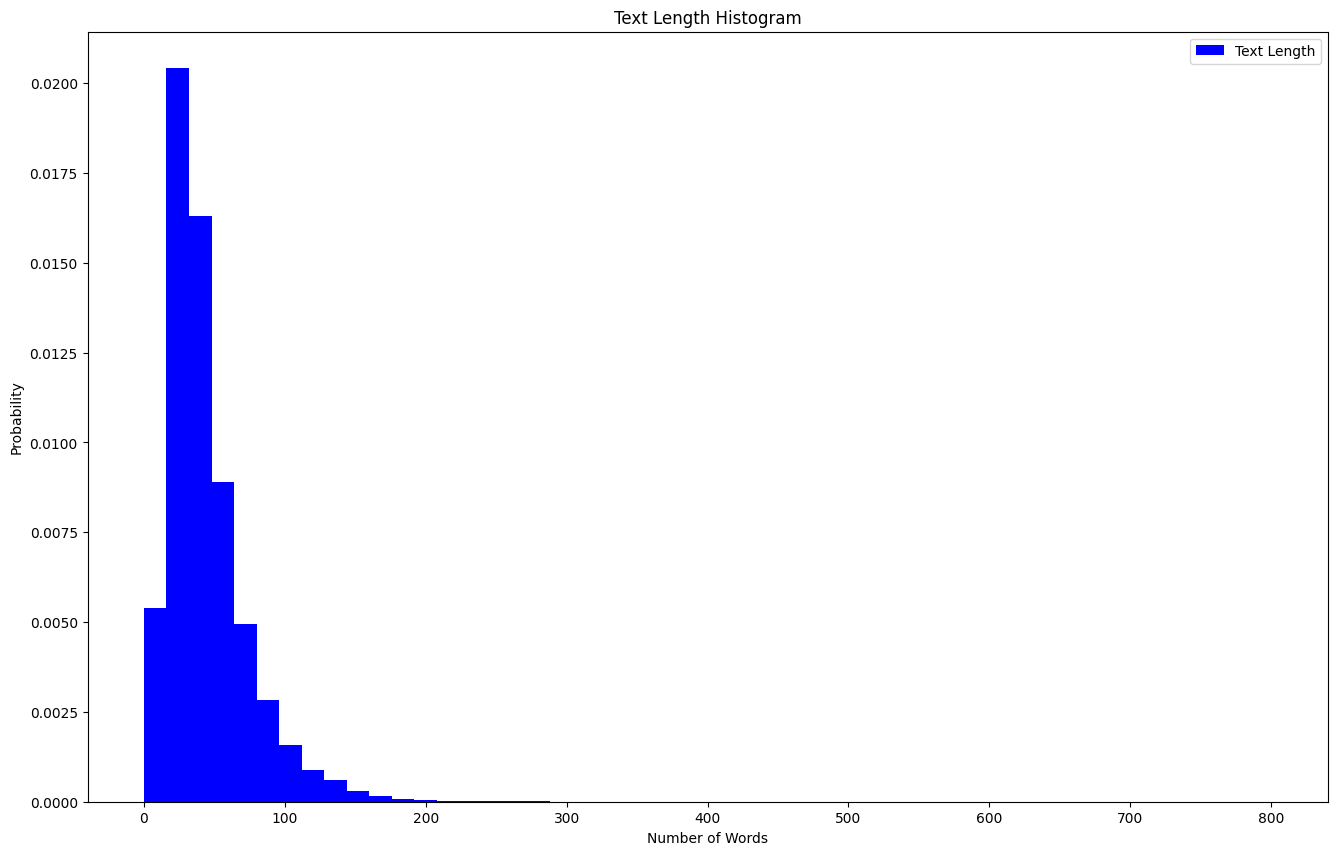

In [ ]:
plt.figure(figsize=(16,10))
plt.hist(texts_len, bins=50, range=[0,800], facecolor='b', density=True, label='Text Length')
plt.title('Text Length Histogram')
plt.legend()
plt.xlabel('Number of Words')
plt.ylabel('Probability')

In [ ]:
for tag in list(tag2id.keys()) :
    globals()[tag] = 0

In [ ]:
for tag in tags :
    for ner in tag :
        globals()[ner] += 1

In [ ]:
for tag in list(tag2id.keys()) :
    print('{:>6} : {:>7,}'. format(tag, globals()[tag]))

 B-PER :  56,813
     O : 4,610,264
 I-PER : 112,653


### 7. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_tags, test_tags = train_test_split(texts, tags, test_size=.2, random_state=42)

In [ ]:
print('Train 문장 : {:>6,}' .format(len(train_texts)))
print('Train 태그 : {:>6,}' .format(len(train_tags)))
print('Test  문장 : {:>6,}' .format(len(test_texts)))
print('Test  태그 : {:>6,}' .format(len(test_tags)))

Train 문장 : 87,410
Train 태그 : 87,410
Test  문장 : 21,853
Test  태그 : 21,853


In [ ]:
train_texts[5]

['첫',
 '출',
 '발',
 '남',
 '상',
 '은',
 '작',
 '은',
 '어',
 '간',
 '하',
 '나',
 '였',
 '어',
 '요',
 '.']

### 8. BERT 토크나이저

In [ ]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer
MODEL_NAME = "beomi/KcELECTRA-base-v2022"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [ ]:
pad_token_id = tokenizer.pad_token_id # 0
cls_token_id = tokenizer.cls_token_id # 101
sep_token_id = tokenizer.sep_token_id # 102
pad_token_label_id = tag2id['O']    # tag2id['O']
cls_token_label_id = tag2id['O']
sep_token_label_id = tag2id['O']

In [ ]:
# 기존 토크나이저는 wordPiece tokenizer로 tokenizing 결과를 반환합니다.
# 데이터 단위를 음절 단위로 변경했기 때문에, tokenizer도 음절 tokenizer로 바꿔줘야함

# berttokenizer를 쓸건데 여기에 들어있는 8000개 밖에 안되는 한국어가 들어있지만 많은수가 음절이다.
# 한국어들의 거의 음절로 존재. -> 음절 단위 tokenizer를 적용해도 vocab id를 어느 정도 획득할 수 있음.
# 그래서 음절로 쪼개면 UNK가 별로 없을 것이다.

def ner_tokenizer(sent, max_seq_length):
    pre_syllable = "_"
    input_ids = [pad_token_id] * (max_seq_length - 1)
    attention_mask = [0] * (max_seq_length - 1)
    token_type_ids = [0] * max_seq_length
    sent = sent[:max_seq_length-2]

    for i, syllable in enumerate(sent):
        if syllable == '_':
            pre_syllable = syllable
        if pre_syllable != "_":
            syllable = '##' + syllable  # 중간 음절에는 모두 prefix를 붙입니다.
            # 우리가 구성한 학습 데이터도 이렇게 구성되었기 때문이라고 함.
            # 이순신은 조선 -> [이, ##순, ##신, ##은, 조, ##선]
        pre_syllable = syllable

        input_ids[i] = (tokenizer.convert_tokens_to_ids(syllable))
        attention_mask[i] = 1

    input_ids = [cls_token_id] + input_ids
    input_ids[len(sent)+1] = sep_token_id
    attention_mask = [1] + attention_mask
    attention_mask[len(sent)+1] = 1
    return {"input_ids":input_ids,
            "attention_mask":attention_mask,
            "token_type_ids":token_type_ids}

In [ ]:
print(ner_tokenizer(train_texts[0], 5))
# 'token_type_ids': [0, 0, 0, 0, 0] 은 segmentA로 0000으로 되어있는거.

{'input_ids': [2, 1912, 4278, 4182, 3], 'attention_mask': [1, 1, 1, 1, 1], 'token_type_ids': [0, 0, 0, 0, 0]}


In [ ]:
tokenized_train_sentences = []
tokenized_test_sentences = []

for text in train_texts:    # 전체 데이터를 tokenizing 합니다.
    tokenized_train_sentences.append(ner_tokenizer(text, 128))
for text in test_texts:
    tokenized_test_sentences.append(ner_tokenizer(text, 128))

In [ ]:
# 우리의 label도 truncation과 tokenizing이 필요하다.
def encode_tags(tags, max_seq_length):
    # label 역시 입력 token과 개수를 맞춰줍니다
    tags = tags[:max_seq_length-2]
    labels = [tag2id[tag] for tag in tags]
    labels = [tag2id['O']] + labels

    padding_length = max_seq_length - len(labels)
    labels = labels + ([pad_token_label_id] * padding_length)

    return labels

In [ ]:
tag2id

{'B-PER': 0, 'O': 1, 'I-PER': 2}

In [ ]:
encode_tags(train_tags[0], 5)

[1, 0, 2, 1, 1]

In [ ]:
train_labels = []
test_labels = []

for tag in train_tags:
    train_labels.append(encode_tags(tag, 128))

for tag in test_tags:
    test_labels.append(encode_tags(tag, 128))

In [ ]:
len(train_labels), len(test_labels)

(87410, 21853)

### 9. Token 데이터셋

In [ ]:
import torch

class TokenDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val) for key, val in self.encodings[idx].items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TokenDataset(tokenized_train_sentences, train_labels)
test_dataset = TokenDataset(tokenized_test_sentences, test_labels)

In [ ]:
pip install accelerate -U

  Using cached accelerate-0.26.1-py3-none-any.whl (270 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.20.1
    Uninstalling accelerate-0.20.1:
      Successfully uninstalled accelerate-0.20.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# BertForSencenceClassification이 아니다! token이 목적이다.
from transformers import BertForTokenClassification, Trainer, TrainingArguments, AutoModelForTokenClassification,EarlyStoppingCallback
import sys

training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    logging_dir='./logs',            # directory for storing logs
    logging_steps=1000, # 1000번쨰 steps마다 log를 보여줌
    learning_rate=3e-5,
    weight_decay=0.01,
    save_total_limit=5,
    save_strategy='steps', # steps로 해야 earlystop이 가능
    evaluation_strategy='steps',
    save_steps=1000, # 1000번쨰 step마다 저장
    eval_steps=1000, # 1000번째 step마다 평가
    seed=15,
    load_best_model_at_end=True # 가장 좋은 성능의 모델로...
)

### 10. BertForTokenClassification (모델 학습 및 성능 확인)

In [ ]:
model = AutoModelForTokenClassification.from_pretrained(MODEL_NAME, num_labels=len(unique_tags))
model.to(device)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,# evaluation dataset
    callbacks = [EarlyStoppingCallback(early_stopping_patience=2)] #loss가 2번 감소하지 않으면 스탑
)

Some weights of ElectraForTokenClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import gc
gc.collect()

5134

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
1000,0.012700,0.003663
2000,0.002300,0.001630
3000,0.001600,0.000887
4000,0.001300,0.001103
5000,0.001100,0.000911


TrainOutput(global_step=5000, training_loss=0.0038029753923416137, metrics={'train_runtime': 2022.2952, 'train_samples_per_second': 129.669, 'train_steps_per_second': 16.21, 'total_flos': 2612991191040000.0, 'train_loss': 0.0038029753923416137, 'epoch': 0.46})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.0008867998258210719,
 'eval_runtime': 169.4301,
 'eval_samples_per_second': 128.979,
 'eval_steps_per_second': 2.019,
 'epoch': 0.46}

In [ ]:
predictions = trainer.predict(test_dataset)
print(predictions.predictions.shape, predictions.label_ids.shape)

(21853, 128, 3) (21853, 128)


In [ ]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
index_to_ner = {i:j for j, i in tag2id.items()}
f_label = [i for i, j in tag2id.items()]
val_tags_l = [index_to_ner[x] for x in np.ravel(predictions.label_ids).astype(int).tolist()]
y_predicted_l = [index_to_ner[x] for x in np.ravel(preds).astype(int).tolist()]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
#데이터셋 추가
print(classification_report(val_tags_l, y_predicted_l, labels=f_label))

              precision    recall  f1-score   support

       B-PER       0.98      1.00      0.99     11529
           O       1.00      1.00      1.00   2762775
       I-PER       0.98      1.00      0.99     22880

    accuracy                           1.00   2797184
   macro avg       0.99      1.00      0.99   2797184
weighted avg       1.00      1.00      1.00   2797184



In [ ]:
#이전
print(classification_report(val_tags_l, y_predicted_l, labels=f_label))

              precision    recall  f1-score   support

       B-PER       0.98      1.00      0.99     11529
           O       1.00      1.00      1.00   2762775
       I-PER       0.98      1.00      0.99     22880

    accuracy                           1.00   2797184
   macro avg       0.99      1.00      0.99   2797184
weighted avg       1.00      1.00      1.00   2797184



In [ ]:
trainer.save_model('content/drive/kcelectra_base_new')

In [ ]:
id2tag

{0: 'B-PER', 1: 'O', 2: 'I-PER'}

In [ ]:
tag2id

{'B-PER': 0, 'O': 1, 'I-PER': 2}

In [ ]:
# 저장한 모델 불러오기
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

from transformers import AutoModel, AutoTokenizer, BertTokenizer
MODEL_NAME = "beomi/KcELECTRA-base-v2022"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

tag2id = {0: 'B-PER', 1: 'O', 2: 'I-PER'}
unique_tags={'B-PER', 'I-PER', 'O'}
id2tag={'B-PER': 0, 'O': 1, 'I-PER': 2}
pad_token_id = tokenizer.pad_token_id # 0
cls_token_id = tokenizer.cls_token_id # 101
sep_token_id = tokenizer.sep_token_id # 102
#pad_token_label_id = tag2id['O']    # tag2id['O']
#cls_token_label_id = tag2id['O']
#sep_token_label_id = tag2id['O']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/504 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/450k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

KeyError: 'O'

In [ ]:
model = AutoModelForTokenClassification.from_pretrained('kcelectra_base_new', num_labels=len(unique_tags))
model.to(device)

ElectraForTokenClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Laye

In [ ]:
# 기존 토크나이저는 wordPiece tokenizer로 tokenizing 결과를 반환합니다.
# 데이터 단위를 음절 단위로 변경했기 때문에, tokenizer도 음절 tokenizer로 변경

# berttokenizer를 사용하는데 한국어 vocab이 8000개 정도 밖에 없고 그 안의 한국어들의 거의 음절로 존재
# -> 음절 단위 tokenizer를 적용하면 vocab id를 어느 정도 획득할 수 있어 UNK가 별로 없을듯 하다
def ner_tokenizer(sent, max_seq_length):
    pre_syllable = "_"
    input_ids = [pad_token_id] * (max_seq_length - 1)
    attention_mask = [0] * (max_seq_length - 1)
    token_type_ids = [0] * max_seq_length
    sent = sent[:max_seq_length-2]

    for i, syllable in enumerate(sent):
        if syllable == '_':
            pre_syllable = syllable
        if pre_syllable != "_":
            syllable = '##' + syllable  # 중간 음절에는 모두 prefix를 붙입니다.
            # 우리가 구성한 학습 데이터도 이렇게 구성되었기 때문이라고 함.
            # 이순신은 조선 -> [이, ##순, ##신, ##은, 조, ##선]
        pre_syllable = syllable

        input_ids[i] = (tokenizer.convert_tokens_to_ids(syllable))
        attention_mask[i] = 1

    input_ids = [cls_token_id] + input_ids
    input_ids[len(sent)+1] = sep_token_id
    attention_mask = [1] + attention_mask
    attention_mask[len(sent)+1] = 1
    return {"input_ids":input_ids,
            "attention_mask":attention_mask,
            "token_type_ids":token_type_ids}

In [ ]:
def ner_inference(text) :

    model.eval()
    text = text.replace(' ', '_')

    predictions , true_labels = [], []
    person_names = []  # 사람 이름을 담을 리스트

    tokenized_sent = ner_tokenizer(text, len(text)+2)
    input_ids = torch.tensor(tokenized_sent['input_ids']).unsqueeze(0).to(device)
    attention_mask = torch.tensor(tokenized_sent['attention_mask']).unsqueeze(0).to(device)
    token_type_ids = torch.tensor(tokenized_sent['token_type_ids']).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)

    logits = outputs['logits']
    logits = logits.detach().cpu().numpy()
    label_ids = token_type_ids.cpu().numpy()

    predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
    true_labels.append(label_ids)

    pred_tags = [list(tag2id.values())[p_i] for p in predictions for p_i in p]

    print('{}\t{}'.format("TOKEN", "TAG"))
    print("===========")
    # for token, tag in zip(tokenizer.decode(tokenized_sent['input_ids']), pred_tags):
    #   print("{:^5}\t{:^5}".format(token, tag))
    for i, tag in enumerate(pred_tags):
        print("{:^5}\t{:^5}".format(tokenizer.convert_ids_to_tokens(tokenized_sent['input_ids'][i]), tag))
        if tag == 'B-PER' or tag == 'I-PER':
            person_names.append(token)

    return person_names

In [ ]:
def ner_inference(text):
    model.eval()
    text = text.replace(' ', '_')

    predictions, true_labels = [], []
    person_names = []  # 사람 이름을 담을 리스트

    tokenized_sent = ner_tokenizer(text, len(text) + 2)
    input_ids = torch.tensor(tokenized_sent['input_ids']).unsqueeze(0).to(device)
    attention_mask = torch.tensor(tokenized_sent['attention_mask']).unsqueeze(0).to(device)
    token_type_ids = torch.tensor(tokenized_sent['token_type_ids']).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)

    logits = outputs['logits']
    logits = logits.detach().cpu().numpy()
    label_ids = token_type_ids.cpu().numpy()

    predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
    true_labels.append(label_ids)

    pred_tags = [list(tag2id.values())[p_i] for p in predictions for p_i in p]
    tokenized_text = tokenizer.convert_ids_to_tokens(tokenized_sent['input_ids'])

    print('{}\t{}'.format("TOKEN", "TAG"))
    print("===========")
    for token, tag in zip(tokenized_text, pred_tags):
        print("{:^5}\t{:^5}".format(token, tag))
        if tag == 'B-PER' or tag == 'I-PER':
            person_names.append(token)
    return person_names

### 11. Test

In [ ]:
text = '''더불어민주당은 30일 윤석열 대통령과 대통령실 이관섭 비서실장을 공직선거법 및 정당법 위반 혐의로 경찰에 고발했다.
민주당 윤석열 정권 관권선거 저지 대책위원회 서영교 위원장과 소병철 부위원장, 강병원 간사는 이날 오전 서울경찰청을 방문해 고발장을 냈다.
민주당은 이 실장이 국민의힘 한동훈 비상대책위원장을 만나 사퇴 요구를 전달한 것으로 알려진 점을 문제 삼아 윤 대통령이 공천과 관련한 당무에 개입해 공직선거법 85조 등을 위반했다고 주장하고 있다.
서 위원장은 "정치 중립을 지켜야 하는 공무원 중 가장 높은 직위자인 대통령이 당무 개입을 통해 선거에 영향을 미치는 어마어마한 일이 발생한 것"이라며 "철저한 수사를 촉구하며, 향후 대통령의 선심성 공약 및 예산 남발 등 모든 것을 매의 눈으로 지켜보겠다"라고 말했다.'''

In [ ]:
person_names = ner_inference(text)
ner_inference(text)

TOKEN	TAG
[CLS]	  O  
  더  	  O  
 ##불 	  O  
 ##어 	  O  
 ##민 	  O  
 ##주 	  O  
 ##당 	  O  
 ##은 	  O  
  _  	  O  
  3  	  O  
 ##0 	  O  
 ##일 	  O  
  _  	  O  
  윤  	B-PER
 ##석 	I-PER
 ##열 	I-PER
  _  	  O  
  대  	  O  
 ##통 	  O  
 ##령 	  O  
 ##과 	  O  
  _  	  O  
  대  	  O  
 ##통 	  O  
 ##령 	  O  
 ##실 	  O  
  _  	  O  
  이  	  O  
 ##관 	  O  
 ##섭 	  O  
  _  	  O  
  비  	  O  
 ##서 	  O  
 ##실 	  O  
 ##장 	  O  
 ##을 	  O  
  _  	  O  
  공  	  O  
 ##직 	  O  
 ##선 	  O  
 ##거 	  O  
 ##법 	  O  
  _  	  O  
  및  	  O  
  _  	  O  
  정  	  O  
 ##당 	  O  
 ##법 	  O  
  _  	  O  
  위  	  O  
 ##반 	  O  
  _  	  O  
  혐  	  O  
 ##의 	  O  
 ##로 	  O  
  _  	  O  
  경  	  O  
 ##찰 	  O  
 ##에 	  O  
  _  	  O  
  고  	  O  
 ##발 	  O  
 ##했 	  O  
 ##다 	  O  
[UNK]	  O  
[UNK]	  O  
[UNK]	  O  
 ##민 	  O  
 ##주 	  O  
 ##당 	  O  
  _  	  O  
  윤  	B-PER
 ##석 	I-PER
 ##열 	I-PER
  _  	  O  
  정  	  O  
 ##권 	  O  
  _  	  O  
  관  	  O  
 ##권 	  O  
 ##선 	  O  
 ##거 	  O  
  _  	

['윤',
 '##석',
 '##열',
 '윤',
 '##석',
 '##열',
 '서',
 '##영',
 '##교',
 '소',
 '##병',
 '##철',
 '강',
 '##병',
 '##원',
 '한',
 '##동',
 '##훈']

In [ ]:
person_names

['윤',
 '##석',
 '##열',
 '윤',
 '##석',
 '##열',
 '서',
 '##영',
 '##교',
 '소',
 '##병',
 '##철',
 '강',
 '##병',
 '##원',
 '한',
 '##동',
 '##훈']